#Enzyme analysis for RhizCG 2013

##Set Variables

In [1]:
workDir = '/home/bryan/RhizCG/figures/'
fullData = '/home/bryan/RhizCG/data/MiSeq_amplicon/PlotData.txt'

#Init

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
library(lme4)
library(lmerTest)
library(ggplot2)
library(dplyr)
library(pbkrtest)
library(gridExtra)
library(multcomp)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: Matrix

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘lmerTest’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following object is masked from ‘package:lme4’:

    lmer


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following object is masked from ‘package:stats’:

    step


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘dplyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/p

###Read plant master table and re-work into N response tables

In [6]:
%%R -i fullData -i workDir
setwd(workDir)
Master = read.table(fullData, header = TRUE)
Master$Rep = as.factor(Master$Rep)
colnames(Master)

 [1] "Unique"             "PlotID"             "Plant"             
 [4] "Plot"               "Treatment"          "Rep"               
 [7] "DAP"                "Sampling"           "PlantSample"       
[10] "Type"               "Grass_Broad"        "Status"            
[13] "Subfamily"          "Symbol_class"       "Plant_num"         
[16] "Leaf_AreaBiomass_g" "Biomass_T"          "Biomass_P"         
[19] "Leaf_Area_cm2"      "SLA"                "Leaf_N"            
[22] "Leaf_C"             "LeafC_N"            "LNa"               
[25] "Plant_N"            "Plant_C"            "Plant_CN"          
[28] "d15N"               "tN_p"               "BX_act"            
[31] "CB_act"             "LAP_act"            "NAG_act"           
[34] "soil_dw"            "BX_activity_g"      "CB_activity_g"     
[37] "LAP_activity_g"     "NAG_activity_g"     "BX_barefactor"     
[40] "CB_barefactor"      "LAP_barefactor"     "NAG_barefactor"    
[43] "BX_dif"             "CB_dif"             "

# Graph enzyme activity in bare vs rhizosphere soils

In [7]:
%%R
e_sel = !is.na(Master$BX_dif)
Enz = Master[e_sel,]


In [8]:
%%R
#calculate means of Bare soil vs Planted treatments
Enz$Planted = as.factor(ifelse(Enz$Plant == "BARE", "Bare Soil", "Rhizosphere"))

by_treat = group_by(Enz, Planted, Treatment)
Emeans = summarize(by_treat,
              N = length(BX_activity_g),
                   bx.m = mean(BX_activity_g),
                   bx.se = sd(BX_activity_g)/sqrt(length(BX_activity_g)),
                  cb.m = mean(CB_activity_g),
                   cb.se = sd(CB_activity_g)/sqrt(length(CB_activity_g)),
                  lap.m = mean(LAP_activity_g),
                   lap.se = sd(LAP_activity_g)/sqrt(length(LAP_activity_g)),
                    nag.m = mean(NAG_activity_g),
                  nag.se = sd(NAG_activity_g)/sqrt(length(NAG_activity_g)))
head(Emeans)

Source: local data frame [4 x 11]
Groups: Planted [2]

      Planted Treatment     N     bx.m     bx.se     cb.m     cb.se    lap.m
       (fctr)    (fctr) (int)    (dbl)     (dbl)    (dbl)     (dbl)    (dbl)
1   Bare Soil      Nneg    32 15.17175 0.6498354 14.29288 0.5461105 126.6001
2   Bare Soil      Npos    32 14.82994 0.7252128 13.78256 0.5471938 134.4734
3 Rhizosphere      Nneg    88 22.32679 0.5840031 20.95171 0.5609904 150.1426
4 Rhizosphere      Npos    88 24.84942 0.6868409 23.96746 0.6087010 158.9072
Variables not shown: lap.se (dbl), nag.m (dbl), nag.se (dbl)


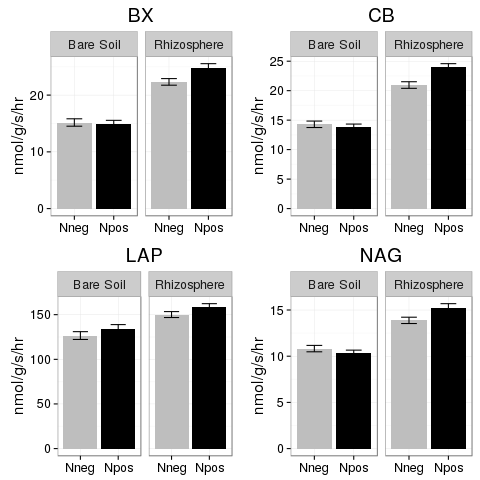

In [9]:
%%R

P1 = ggplot(Emeans, aes(x = Treatment, y = bx.m, fill = Treatment)) +
        scale_fill_manual(values = c("grey","black"))+
        geom_bar(stat = "identity") + 
        geom_errorbar(data = Emeans, aes(y = bx.m,
                  ymin = bx.m - bx.se, ymax = bx.m + bx.se), width = 0.4)+
        ylab("nmol/g/s/hr")+
        ggtitle("BX") +
        theme_bw(base_size = 16)+
        theme(axis.title.x = element_blank()) +
        facet_grid(. ~ Planted)+
        theme(legend.position="none")
        

P2 = ggplot(Emeans, aes(x = Treatment, y = cb.m, fill = Treatment)) +
        scale_fill_manual(values = c("grey","black"))+
        geom_bar(stat = "identity") + 
        geom_errorbar(data = Emeans, aes(y = cb.m,
                  ymin = cb.m - cb.se, ymax = cb.m + cb.se), width = 0.4)+
        ylab("nmol/g/s/hr")+
        ggtitle("CB") +
        theme_bw(base_size = 16)+
        theme(axis.title.x = element_blank()) +
        facet_grid(. ~ Planted)+
        theme(legend.position="none")

P3 = ggplot(Emeans, aes(x = Treatment, y = lap.m, fill = Treatment)) +
        scale_fill_manual(values = c("grey","black"))+
        geom_bar(stat = "identity") + 
        geom_errorbar(data = Emeans, aes(y = lap.m,
                  ymin = lap.m - lap.se, ymax = lap.m + lap.se),
                   colour = 'black', width = 0.4) +
        theme(axis.title.x = element_blank()) +
        ylab("nmol/g/s/hr")+
        ggtitle("LAP") +
        theme_bw(base_size = 16)+
        theme(axis.title.x = element_blank()) +
        facet_grid(. ~ Planted)+
        theme(legend.position="none")

P4 = ggplot(Emeans, aes(x = Treatment, y = nag.m, fill = Treatment))  +
        scale_fill_manual(values = c("grey","black"))+
        geom_bar(stat = "identity") + 
        geom_errorbar(data = Emeans, aes(y = nag.m,
                  ymin = nag.m - nag.se, ymax = nag.m + nag.se),
                   colour = 'black', width = 0.4) +
        theme(axis.title.x = element_blank())+ 
        ylab("nmol/g/s/hr") +
        ggtitle("NAG") +
        theme_bw(base_size = 16)+
        theme(axis.title.x = element_blank()) +
        facet_grid(. ~ Planted)+
        theme(legend.position="none")


#print to file
#pdf(file = "enzyme_rhizosphere_xTreatment.pdf")
grid.arrange(P1, P2, P3, P4, ncol = 2)
#dev.off

## Model

Notes: Rep has small random effect for BX, CB and NAG once nested Rep:Plant term is added.  However, REP contains considerable informatiomn for LAP.  Also possible to use Plot variable as random effect to avoid confusion. 

Residuals checked.  With exception of few outliers of predicted values residuals are normally and evenly distributed.   

Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                   Sum Sq Mean Sq NumDF  DenDF F.value    Pr(>F)    
Planted           224.464 224.464     1  48.65 15.0614 0.0003131 ***
Treatment          55.804  55.804     1 146.33  3.7444 0.0549135 .  
Planted:Treatment  96.272  96.272     1 146.33  6.4598 0.0120753 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
             Sum Sq Mean Sq NumDF  DenDF F.value    Pr(>F)    
PlantedTreat 502.07  167.36     3 137.82  11.229 1.225e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


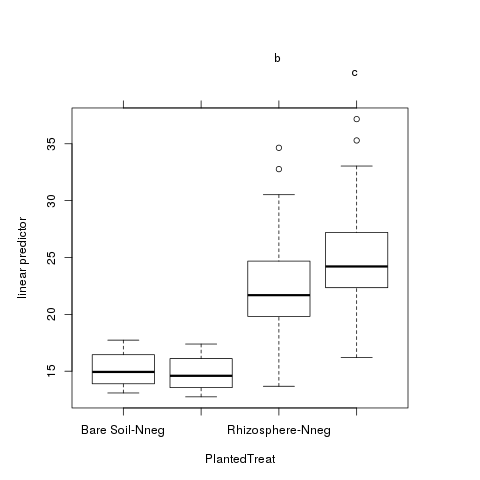

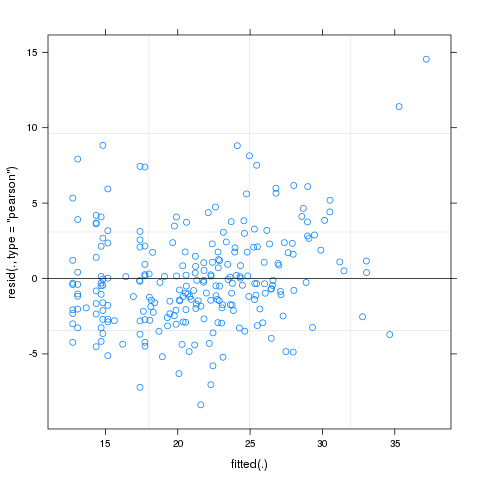

In [10]:
%%R

Enz$PlantedTreat = paste(Enz$Planted, Enz$Treatment, sep = "-")
m = lmer(BX_activity_g ~ Planted + Treatment + Planted:Treatment + (1|Rep) + (1|Rep:Plant), 
          data = Enz)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print
m1 = lmer(BX_activity_g ~ PlantedTreat + (1|Rep) + (1|Rep:Plant), 
          data = Enz)
         #summary(m1) %>% print
         anova(m1, ddf="Kenward-Roger", type=3) %>% print
        m1.lsm = lsmeans(m1)
        m1.glht = glht(m1, linfct = mcp(PlantedTreat = "Tukey"))
        summary(m1.glht)
m1.cld = cld(m1.glht, level = 0.05)
old.par <- par(mai=c(1,1,1.5,1), no.readonly = TRUE)
plot(m1.cld)
        

plot(m)

In [ ]:
%%R

Enz$PlantedTreat = paste(Enz$Planted, Enz$Treatment, sep = "-")
m = lmer(CB_activity_g ~ Planted + Treatment + Planted:Treatment + (1|Rep) + (1|Rep:Plant), 
          data = Enz)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print
m1 = lmer(CB_activity_g ~ PlantedTreat + (1|Rep) + (1|Rep:Plant), 
          data = Enz)
         #summary(m1) %>% print
         anova(m1, ddf="Kenward-Roger", type=3) %>% print
        m1.lsm = lsmeans(m1)
        m1.glht = glht(m1, linfct = mcp(PlantedTreat = "Tukey"))
        summary(m1.glht)
# m1.cld = cld(m1.glht, level = 0.05)
# old.par <- par(mai=c(1,1,1.5,1), no.readonly = TRUE)
# plot(m1.cld)
plot(m)

In [ ]:
%%R

Enz$PlantedTreat = paste(Enz$Planted, Enz$Treatment, sep = "-")
m = lmer(LAP_activity_g ~ Planted + Treatment + Planted:Treatment + (1|Rep) + (1|Rep:Plant), 
          data = Enz)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print
m1 = lmer(LAP_activity_g ~ PlantedTreat + (1|Rep) + (1|Rep:Plant), 
          data = Enz)
         #summary(m1) %>% print
         anova(m1, ddf="Kenward-Roger", type=3) %>% print
        m1.lsm = lsmeans(m1)
        m1.glht = glht(m1, linfct = mcp(PlantedTreat = "Tukey"))
       # summary(m1.glht)
m1.cld = cld(m1.glht, level = 0.05)
old.par <- par(mai=c(1,1,1.5,1), no.readonly = TRUE)
plot(m1.cld)
plot(m)

In [ ]:
%%R

Enz$PlantedTreat = paste(Enz$Planted, Enz$Treatment, sep = "-")
m = lmer(NAG_activity_g ~ Planted + Treatment + Planted:Treatment + (1|Rep) + (1|Rep:Plant), 
          data = Enz)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print
m1 = lmer(NAG_activity_g ~ PlantedTreat + (1|Rep) + (1|Rep:Plant), 
          data = Enz)
         #summary(m1) %>% print
         anova(m1, ddf="Kenward-Roger", type=3) %>% print
        m1.lsm = lsmeans(m1)
        m1.glht = glht(m1, linfct = mcp(PlantedTreat = "Tukey"))
        summary(m1.glht)
# m1.cld = cld(m1.glht, level = 0.05)
# old.par <- par(mai=c(1,1,1.5,1), no.readonly = TRUE)
# plot(m1.cld)
plot(m)

# Model rhizosphere effect

## First with just treatment effects

In [11]:
%%R
PlantEnz = Enz[Enz$Planted == "Rhizosphere",]
PlantEnz$Rep = as.factor(PlantEnz$Rep)

In [ ]:
%%R
m = lmer(log(BX_rel) ~ Plant + Treatment + Plant:Treatment + (1|Rep) + (1|Rep:Plant), 
          data = PlantEnz)
         summary(m) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

        

plot(m)

In [14]:
%%R
m = lmer(log(CB_rel) ~ Plant + Treatment + Plant:Treatment + (1|Rep) + (1|Rep:Plant), 
          data = PlantEnz)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print
        summary(m)

        

#plot(m)

/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Correlation matrix not shown by default, as p = 44 > 20.
Use print(object, correlation=TRUE)  or
	 vcov(object)	 if you need it


  res = super(Function, self).__call__(*new_args, **new_kwargs)


Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                Sum Sq Mean Sq NumDF DenDF F.value    Pr(>F)    
Plant           1.3678 0.06513    21    63   1.839   0.03317 *  
Treatment       1.4702 1.47019     1    66  41.506 1.568e-08 ***
Plant:Treatment 1.1692 0.05567    21    66   1.572   0.08443 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Linear mixed model fit by REML t-tests use Satterthwaite approximations to
  degrees of freedom [lmerMod]
Formula: log(CB_rel) ~ Plant + Treatment + Plant:Treatment + (1 | Rep) +  
    (1 | Rep:Plant)
   Data: PlantEnz

REML criterion at convergence: 12.6

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.15376 -0.55095  0.04641  0.57986  1.99759 

Random effects:
 Groups    Name        Variance Std.Dev.
 Rep:Plant (Intercept) 0.004792 0.06922 
 Rep       (Intercept) 0.001072 0.03275 
 Residual              0.035421 0.18821 
Number of obs: 176, groups

In [16]:
%%R
m = lmer(log(LAP_rel) ~ Plant + Treatment + Plant:Treatment + (1|Rep) + (1|Rep:Plant), 
          data = PlantEnz)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print
            summary(m)
        



Analysis of Variance Table of type III  with  Kenward-Roger 
approximation for degrees of freedom
                 Sum Sq   Mean Sq NumDF DenDF F.value   Pr(>F)   
Plant           0.57822 0.0275343    21    63 2.24072 0.007318 **
Treatment       0.00012 0.0001216     1    66 0.00989 0.921073   
Plant:Treatment 0.49337 0.0234936    21    66 1.91189 0.024337 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Linear mixed model fit by REML t-tests use Satterthwaite approximations to
  degrees of freedom [lmerMod]
Formula: log(LAP_rel) ~ Plant + Treatment + Plant:Treatment + (1 | Rep) +  
    (1 | Rep:Plant)
   Data: PlantEnz

REML criterion at convergence: -91.3

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.28360 -0.47513  0.03022  0.45275  2.36834 

Random effects:
 Groups    Name        Variance Std.Dev.
 Rep:Plant (Intercept) 0.00673  0.08203 
 Rep       (Intercept) 0.00251  0.05010 
 Residual              0.01229  0.11085 
Number of obs: 176, 

In [ ]:
%%R
m = lmer(log(NAG_rel) ~ Plant + Treatment + Plant:Treatment + (1|Rep) + (1|Rep:Plant), 
          data = PlantEnz)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

        

plot(m)

In [23]:
%%R
by_treat = group_by(PlantEnz, Plant, Treatment)
Emeans = summarize(by_treat,
              N = length(BX_rel),
                   bx.m = mean(BX_rel),
                   bx.se = sd(BX_rel)/sqrt(length(BX_rel)),
                  cb.m = mean(CB_rel),
                   cb.se = sd(CB_rel)/sqrt(length(CB_rel)),
                  lap.m = mean(LAP_rel),
                   lap.se = sd(LAP_rel)/sqrt(length(LAP_rel)),
                    nag.m = mean(NAG_rel),
                  nag.se = sd(NAG_rel)/sqrt(length(NAG_rel)))
head(Emeans)

Source: local data frame [6 x 11]
Groups: Plant [3]

   Plant Treatment     N     bx.m     bx.se     cb.m     cb.se    lap.m
  (fctr)    (fctr) (int)    (dbl)     (dbl)    (dbl)     (dbl)    (dbl)
1 75-062      Nneg     4 1.410555 0.2355612 1.491043 0.2796418 1.208871
2 75-062      Npos     4 1.731261 0.1529143 1.919034 0.1769265 1.236364
3  ABUTH      Nneg     4 1.591899 0.1777430 1.451152 0.1416835 1.043602
4  ABUTH      Npos     4 2.632162 0.3406024 2.419472 0.2616576 1.332508
5  AMAPO      Nneg     4 1.785122 0.2641789 1.718336 0.2163452 1.190163
6  AMAPO      Npos     4 1.722847 0.1405241 1.699689 0.1462254 1.211164
Variables not shown: lap.se (dbl), nag.m (dbl), nag.se (dbl)


png 
  2 


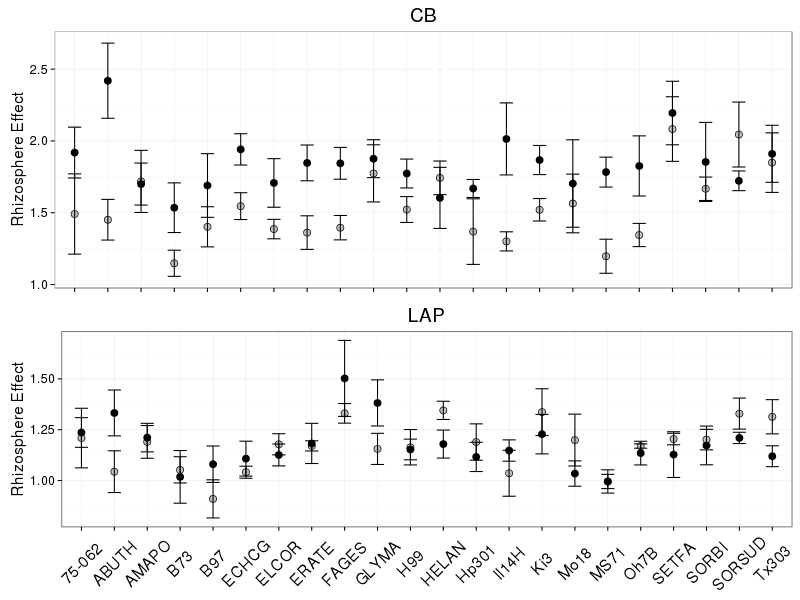

In [46]:
%%R -w 800 -h 600
P1 = ggplot(Emeans, aes(x = Plant, y = cb.m, fill = Treatment)) +
        geom_point(pch = 21, size = 3) + 
        geom_errorbar(data = Emeans, aes(y = cb.m,
                  ymin = cb.m - cb.se, ymax = cb.m + cb.se), width = 0.4)+
        scale_fill_manual(values = c("grey","black")) +
        ylab("Rhizosphere Effect")+
        ggtitle("CB") +
        theme_bw(base_size = 16)+
        theme(axis.title.x = element_blank()) +
        theme(legend.position="none") +
        theme(axis.text.x  = element_blank())
P2 = ggplot(Emeans, aes(x = Plant, y = lap.m, fill = Treatment)) +
        geom_point(pch = 21, size = 3) + 
        geom_errorbar(data = Emeans, aes(y = lap.m,
                  ymin = lap.m - lap.se, ymax = lap.m + lap.se), width = 0.4)+
        scale_fill_manual(values = c("grey","black")) +
        ylab("Rhizosphere Effect")+
        ggtitle("LAP") +
        theme_bw(base_size = 16)+
        theme(axis.title.x = element_blank()) +
        theme(legend.position="none") +
        theme(axis.text.x  = element_text(angle=45, vjust=0.5, size=16))

P = grid.arrange(P1, P2, ncol = 1)

pdf(file = "/home/bryan/RhizCG/figures/enzymes_plant.pdf", width = 10, height = 8)
grid.arrange(P1, P2, ncol = 1)
dev.off()

In [ ]:
%%R

P1 = ggplot(Emeans, aes(x = Treatment, y = bx.m, fill = Treatment)) +
        scale_fill_manual(values = c("grey","black"))+
        geom_point(fill = Treatment) + 
        geom_errorbar(data = Emeans, aes(y = bx.m,
                  ymin = bx.m - bx.se, ymax = bx.m + bx.se), width = 0.4)+
        ylab("Rhizosphere Effect")+
        ggtitle("BX") +
        theme_bw()+
        theme(axis.title.x = element_blank()) +
        theme(legend.position="none")
        

P2 = ggplot(Emeans, aes(x = Treatment, y = cb.m, fill = Treatment)) +
        scale_fill_manual(values = c("grey","black"))+
        geom_bar(stat = "identity") + 
        geom_errorbar(data = Emeans, aes(y = cb.m,
                  ymin = cb.m - cb.se, ymax = cb.m + cb.se), width = 0.4)+
        ylab("Rhizosphere Effect")+
        ggtitle("CB") +
        theme_bw()+
        theme(axis.title.x = element_blank()) +
        theme(legend.position="none")

P3 = ggplot(Emeans, aes(x = Treatment, y = lap.m, fill = Treatment)) +
        scale_fill_manual(values = c("grey","black"))+
        geom_bar(stat = "identity") + 
        geom_errorbar(data = Emeans, aes(y = lap.m,
                  ymin = lap.m - lap.se, ymax = lap.m + lap.se),
                   colour = 'black', width = 0.4) +
        theme(axis.title.x = element_blank()) +
        ylab("Rhizosphere Effect")+
        ggtitle("LAP") +
        theme_bw()+
        theme(axis.title.x = element_blank()) +
        theme(legend.position="none")

P4 = ggplot(Emeans, aes(x = Treatment, y = nag.m, fill = Treatment))  +
        scale_fill_manual(values = c("grey","black"))+
        geom_bar(stat = "identity") + 
        geom_errorbar(data = Emeans, aes(y = nag.m,
                  ymin = nag.m - nag.se, ymax = nag.m + nag.se),
                   colour = 'black', width = 0.4) +
        theme(axis.title.x = element_blank())+ 
        ylab("Rhizosphere Effect") +
        ggtitle("NAG") +
        theme_bw()+
        theme(axis.title.x = element_blank()) +
        theme(legend.position="none")


#print to file
#pdf(file = "enzyme_rhizosphere_xTreatment.pdf")
grid.arrange(P1, P2, P3, P4, ncol = 2)
#dev.off

## Is N treatment effect due to fertilizer effects on plant growth or releiving N limitation in the rhizosphere

In [ ]:
%%R
m = lmer(log(BX_activity_g) ~ Resid_logN + InorganicN + (1|Rep) + (1|Rep:Plant), 
          data = PlantEnz)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

        

plot(m)

In [ ]:
%%R
m = lmer(CB_rel ~ Treatment + Resid_logN +  InorganicN + (1|Rep) + (1|Rep:Plant), 
          data = PlantEnz)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

        

plot(m)

In [ ]:
%%R
m = lmer(LAP_activity_g ~ Treatment + Resid_logN + InorganicN + (1|Rep) + (1|Rep:Plant), 
          data = PlantEnz)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

        

plot(m)

In [ ]:
%%R
m = lmer(NAG_rel ~ InorganicN + (1|Rep) + (1|Rep:Plant), 
          data = PlantEnz)
         #summary(m1) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print

        

plot(m)

## Now include covariates

Notes on potential variables: Plant, Type, Treatment, DAP, Residual variables as plant traits

In [ ]:
%%R
PlantEnz = Enz[Enz$Planted == "Rhizosphere",]
colnames(PlantEnz)

In [ ]:
%%R
#Create relative Inorganic N variable by calculating the average inorganic N
#in bare soil plots for each sampling date*N treatment combination.  Use separate file.
#Then join reference table with Master
Bare = Enz[Enz$Plant == "BARE",]
Nmin_control = group_by(Bare, Sampling, Treatment) %>%
                summarise(bare_NH4 = mean(NH4_ug_g),
                          bare_NO3 = mean(NO3_ug_g),
                          bare_InorganicN = mean(InorganicN))
Nmin_control

Enzsel = Enz[Enz$PlotID!= "4.16_Npos",]
Plant = Enzsel[Enzsel$Plant != "BARE",]
Plant = left_join(Plant, Nmin_control, by = c("Sampling" = "Sampling", "Treatment" = "Treatment"))
Plant$InorganicN_RE = Plant$InorganicN - Plant$bare_InorganicN
dim(Plant)
head(Plant)

In [ ]:
%%R

m = lmer(log(BX_rel) ~  Plant + Treatment + Resid_logCN + 
        Resid_logN   + Plant:Treatment + (1|Rep) + (1|Rep:Plant), 
          data = Plant, na.rm = TRUE)
         summary(m) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print


#         m.lsm = lsmeans(m)
#         m.glht = glht(m1, linfct = mcp(PlantedTreat = "Tukey"))
#        # summary(m1.glht)
# m1.cld = cld(m1.glht, level = 0.05)
# old.par <- par(mai=c(1,1,1.5,1), no.readonly = TRUE)
# plot(m1.cld)
plot(m)


First, tested model with plant, treatment, plant:treatment, residual SLA, residual logN, residual logB, residual logCN.  Residual logBiomass and logN are colinear, so neither are significant when both are in the model.  Remove log biomass.  logLeafN not significant, remove.  logSLA not significant, remove.  LogCN is more significant when logN is included.  logN is more significant when log CN is included. 
BX_rel ~ Plant + Treatment + Resid_logCN + Resid_logN + Plant:Treatment + (1|Rep) + (1|Rep:Plant). 

Add inorganicN_RE (rhizosphere effect) to parsed down model:
When added residN is still significant, but residLogCN is no longer.  Interestingly, InorganicN_RE is not significant. 

Double checked Inorganic N in case calculation was skewing results.  Still not signficant and has same effect on other terms.  Remove inorganic N from model.  

Residuals are heteroskedastic, log transform.

Interactions of residuals and treatments are not sigificant.  

Best model:
m = lmer(log(BX_rel) ~  Plant + Treatment + Resid_logCN + 
        Resid_logN   + Plant:Treatment + (1|Rep) + (1|Rep:Plant), 
          data = Plant, na.rm = TRUE)

In [ ]:
%%R
m = lmer(log(CB_rel) ~  Plant + Treatment + 
          InorganicN_RE + 
         (1|Rep) + (1|Rep:Plant), 
          data = Plant, na.rm = TRUE)
         summary(m) %>% print
         anova(m, ddf="Kenward-Roger", type=3) %>% print


#         m.lsm = lsmeans(m)
#         m.glht = glht(m1, linfct = mcp(PlantedTreat = "Tukey"))
#        # summary(m1.glht)
# m1.cld = cld(m1.glht, level = 0.05)
# old.par <- par(mai=c(1,1,1.5,1), no.readonly = TRUE)
# plot(m1.cld)
plot(m)

Notes:
Follows similar pattern as BX except log transformation may not be necessary.  
If Plant:Treatment is removed InorganicN_RE is marginally significant, but not when Plant is removed